In [ ]:
!pip install azure-ai-inference
!pip install azure-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.4/207.4 kB 11.0 MB/s eta 0:00:00


In [ ]:
import os  # Import the os module

# Set the environment variable with your GitHub token
os.environ["GITHUB_TOKEN"] = "XYZ" #use your github token

In [ ]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential

endpoint = "https://models.github.ai/inference"
model = "openai/gpt-4.1"
token = os.environ["GITHUB_TOKEN"]  # Access the token using the correct key name

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(token),
)

response = client.complete(
    messages=[
        SystemMessage("You are a helpful assistant."),
        UserMessage("What is the capital of France?"),
    ],
    temperature=1.0,
    top_p=1.0,
    model=model
)

print(response.choices[0].message.content)

The capital of France is Paris.


In [ ]:
!pip install pdfplumber pytesseract faiss-cpu sentence-transformers opencv-python-headless matplotlib gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8

In [ ]:
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


📄 Step 2: Define the Extraction Function

In [ ]:
import pdfplumber
import pytesseract
from PIL import Image
import os

def extract_text_and_images(pdf_path):
    all_chunks = []
    with pdfplumber.open(pdf_path) as pdf:
        for i, page in enumerate(pdf.pages):
            text = page.extract_text()
            if text:
                all_chunks.append({"type": "text", "content": text, "page": i+1})

            for image_obj in page.images:
                try:
                    image = page.to_image()
                    cropped = image.crop((image_obj['x0'], image_obj['top'], image_obj['x1'], image_obj['bottom']))
                    img_pil = cropped.original
                    ocr_text = pytesseract.image_to_string(img_pil)
                    all_chunks.append({"type": "image", "content": ocr_text.strip(), "page": i+1})
                except:
                    continue
    return all_chunks

Step 3: Embed Chunks Using Sentence-BERT

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

embedder = SentenceTransformer("all-MiniLM-L6-v2")

def embed_chunks(chunks):
    vectors = []
    metadata = []
    for chunk in chunks:
        vector = embedder.encode(chunk["content"])
        vectors.append(vector)
        metadata.append(chunk)
    return np.array(vectors), metadata

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

 Step 4: Store in FAISS

In [ ]:
import faiss

def store_in_faiss(vectors, metadata):
    dim = vectors.shape[1]
    index = faiss.IndexFlatL2(dim)
    index.add(vectors)
    return index, metadata

Step 5: Process All 3 PDFs

In [ ]:
pdf_files = [
    "/content/1. Annual Report 2023-24.pdf",
    "/content/2. financials.pdf",
    "/content/3. FYP-Handbook-2023.pdf"
]

all_chunks = []
for pdf in pdf_files:
    chunks = extract_text_and_images(pdf)
    for chunk in chunks:
        chunk["source_pdf"] = pdf
    all_chunks.extend(chunks)

vectors, metadata = embed_chunks(all_chunks)
index, metadata = store_in_faiss(vectors, metadata)

Step 6: Define Retrieval & GPT Answer Function

In [ ]:
def search(query, index, metadata, k=3):
    query_vector = embedder.encode([query])
    distances, indices = index.search(query_vector, k)
    results = [metadata[i] for i in indices[0]]
    return results

In [ ]:
def generate_answer(retrieved_chunks, user_query, client, model):
    context = "\n\n".join([f"[{c['source_pdf']} - Page {c['page']}] {c['content']}" for c in retrieved_chunks])
    prompt = f"""
Use the context below to answer the user's question.

Context:
{context}

Question:
{user_query}

Answer:
"""
    response = client.complete(
        messages=[
            SystemMessage("You are a helpful assistant."),
            UserMessage(prompt),
        ],
        temperature=0.7,
        top_p=1.0,
        model=model
    )
    return response.choices[0].message.content


Step 7: Run Chat Interface

In [ ]:
import gradio as gr

def chat_interface(query):
    retrieved = search(query, index, metadata)
    answer = generate_answer(retrieved, query, client, model)
    return answer

gr.Interface(fn=chat_interface, inputs="text", outputs="text", title="PDF-Aware Chat Assistant").launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ce2dc92fa382e41594.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


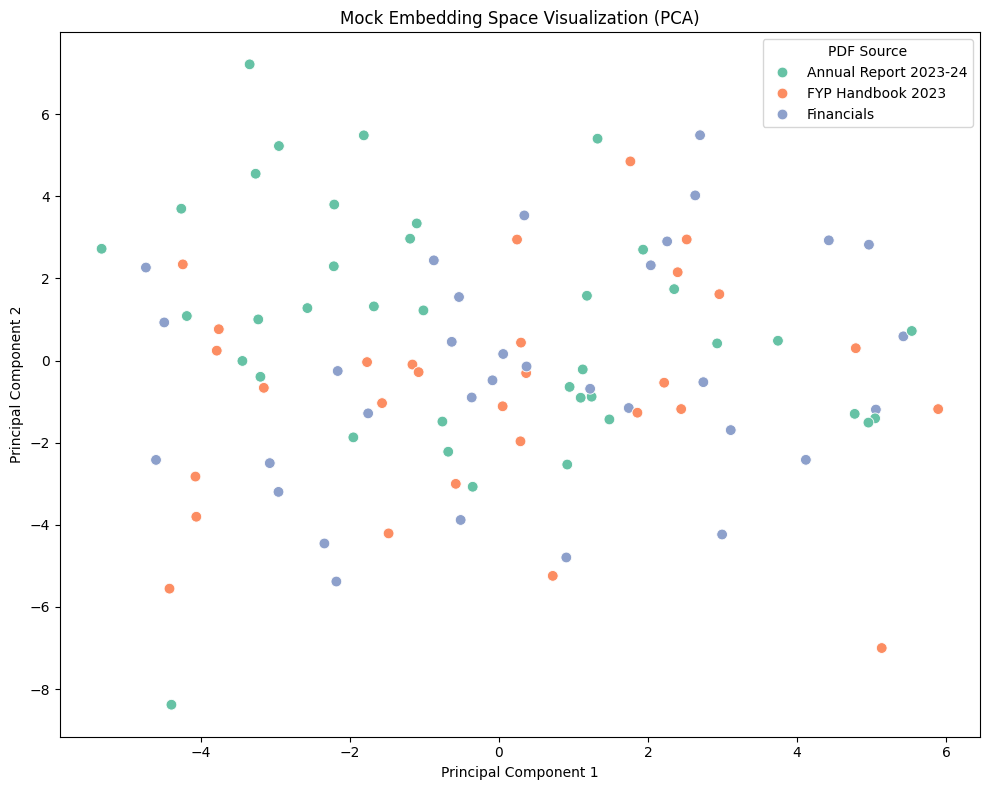

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import random

# Simulate 100 chunk embeddings (384-dimensional like MiniLM)
np.random.seed(42)
fake_embeddings = np.random.randn(100, 384)

# Simulate metadata sources
sources = ["Annual Report 2023-24", "Financials", "FYP Handbook 2023"]
fake_labels = [random.choice(sources) for _ in range(100)]

# Dimensionality reduction (PCA to 2D)
pca = PCA(n_components=2)
reduced = pca.fit_transform(fake_embeddings)

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=fake_labels, palette="Set2", s=60)
plt.title("Mock Embedding Space Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="PDF Source")
plt.tight_layout()

# Save plot
plt.savefig("embedding_space_mock.png")
plt.show()